In [1]:
import pandas as pd
from scipy.stats import linregress
from scipy.stats import zscore
import numpy as np
import scipy.stats as stat

In [2]:
_all_df = pd.read_csv('all_data.csv')
_all_df_logit = pd.read_csv('all_data_logit.csv')

Here are the columns:

In [3]:
_all_df.columns

Index(['year', 'state', 'result', 'rep_incumbent', 'inc_pct', 'result_house_2',
       'result_senate_2', 'result_house_4', 'result_senate_4', 'result_pres_4',
       'result_house_6', 'result_senate_6', 'result_house_8',
       'result_senate_8', 'result_pres_8', 'result_house_10',
       'result_senate_10', 'result_house_12', 'result_senate_12',
       'result_pres_12', 'result_house_14', 'result_senate_14',
       'result_house_16', 'result_senate_16', 'result_pres_16',
       'result_house_18', 'result_senate_18', 'result_house_20',
       'result_senate_20', 'result_pres_20', 'result_house_22',
       'result_senate_22', 'result_house_24', 'result_senate_24',
       'result_pres_24', 'american_indian', 'asian', 'black', 'more_than_one',
       'pacific_islander', 'white', 'hispanic', 'white_non_hispanic',
       'hs_higher_pct', 'bachelor_higher_pct', 'urbanicity',
       'unemployment_pct', 'white_evangelist_pct', 'gdp_1', 'gdp_4',
       'household_income_1', 'household_income_4

If you want to filter the data set:

In [4]:
filter = (_all_df['year'] >= 2016) #Do (_all_df['year'] == _all_df['year']) if you want no filtering
#filter = (_all_df['year'] >= 2016) #These would filter to just the two most recent elections
all_df = _all_df[filter]
all_df_logit = _all_df_logit[filter]

Plots and calculates R^2

r^2 without logit: 0.522456449189657 	 p = 2.0603722773818994e-17
r^2 with logit: 0.5176281515987834 	 p = 3.388184612612712e-17


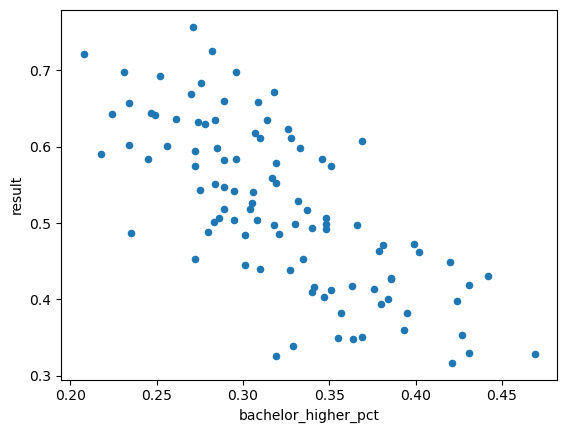

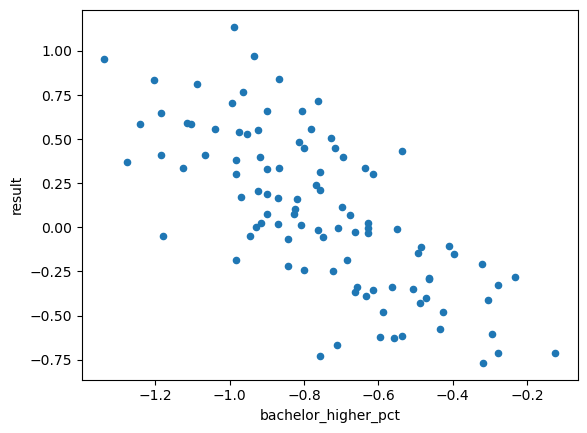

In [5]:
remove_outliers = True
outlier_z_thresh = 3

x = 'bachelor_higher_pct'
y = 'result'

temp_df = all_df[[x,y]].dropna(axis = 0, how = 'any')
if remove_outliers: temp_df = temp_df[(np.abs(zscore(temp_df)) < outlier_z_thresh).all(axis=1)]
_,_,r,p,_ = linregress(temp_df[x], temp_df[y])
print(f'r^2 without logit: {r**2} \t p = {p}')
temp_df.plot.scatter(x,y)

temp_df = all_df_logit[[x,y]].dropna(axis = 0, how = 'any')
if remove_outliers: temp_df = temp_df[(np.abs(zscore(temp_df)) < outlier_z_thresh).all(axis=1)]
_,_,r,p,_ = linregress(temp_df[x], temp_df[y])
print(f'r^2 with logit: {r**2} \t p = {p}')
temp_df.plot.scatter(x,y)

_ = ''

In [6]:
from sklearn import linear_model as lm

In [7]:
remove_outliers = True
outlier_z_thresh = 3

x = ['white_evangelist_pct', 'asian', 'bachelor_higher_pct']
y = 'result'


temp_df = all_df[x + [y]].dropna(axis = 0, how = 'any')
if remove_outliers: temp_df = temp_df[(np.abs(zscore(temp_df)) < outlier_z_thresh).all(axis=1)]
model = lm.LinearRegression(fit_intercept=True)
model.fit(temp_df[x],temp_df[y])
r2 = model.score(X = temp_df[x], y = temp_df[y])
print(f'r^2 without logit: {r2}')

temp_df = all_df_logit[x + [y]].dropna(axis = 0, how = 'any')
if remove_outliers: temp_df = temp_df[(np.abs(zscore(temp_df)) < outlier_z_thresh).all(axis=1)]
model = lm.LinearRegression(fit_intercept=True)
model.fit(temp_df[x],temp_df[y])
r2 = model.score(X = temp_df[x], y = temp_df[y])
print(f'r^2 without logit: {r2}')

r^2 without logit: 0.6787589861073691
r^2 without logit: 0.6779428321920979


In [8]:
model = lm.LassoCV(fit_intercept= False)
filter = (_all_df['year'] >= 2016) #Do (_all_df['year'] == _all_df['year']) if you want no filtering
#filter = (_all_df['year'] >= 2016) #These would filter to just the two most recent elections
all_df = _all_df[filter]
temp_df = all_df_logit[['result'] + list(all_df.columns[5:])].dropna(axis = 1, how = 'all')
temp_df = temp_df[temp_df.columns[~temp_df.columns.str.contains('senate')]].dropna(axis = 0, how = 'any')
#temp_df = (temp_df - temp_df.mean())/temp_df.std()
X = temp_df.iloc[:,1:]
y = temp_df['result']
model.fit(X, y)

/Users/misunguyen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002398535734751517, tolerance: 0.001774831121951402
  model = cd_fast.enet_coordinate_descent_gram(
/Users/misunguyen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002440953030963311, tolerance: 0.001774831121951402
  model = cd_fast.enet_coordinate_descent_gram(
/Users/misunguyen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002161730092870462, tolerance: 0.001774831121951402
  model = cd_fast.enet_coordinate_descent_gram(
/Users/misunguyen/anaconda3/lib/py

LassoCV(fit_intercept=False)

In [9]:
model.score(X,y)

0.9630425423718422

In [10]:
for a in zip(X.columns, model.coef_):
    print(a)

('result_house_2', 0.12246810372493235)
('result_house_4', 0.03336233062979553)
('result_pres_4', 0.5511217278231906)
('result_house_6', 0.012417669703710311)
('result_house_8', 0.0)
('result_pres_8', 0.05161709044318928)
('result_house_10', -0.05149691602015)
('result_house_12', 0.012928682965029411)
('result_pres_12', 0.13032484974079098)
('result_house_14', 0.0)
('result_house_16', 0.0)
('result_pres_16', 0.0)
('result_house_18', -0.0036592507604978866)
('result_house_20', -0.026256056782137067)
('result_pres_20', -0.02425216419974973)
('result_house_22', 0.0)
('result_house_24', 0.017433013730730192)
('result_pres_24', 0.0)
('american_indian', 0.008294360348234739)
('asian', -0.0)
('black', -0.023469718585129862)
('more_than_one', 0.025947699031349244)
('pacific_islander', -0.020299727966509768)
('white', 0.0043472994459146045)
('hispanic', -0.0)
('white_non_hispanic', -0.032568978878036725)
('hs_higher_pct', -0.0)
('bachelor_higher_pct', -0.18684560766706268)
('urbanicity', -0.0)


<Axes: >

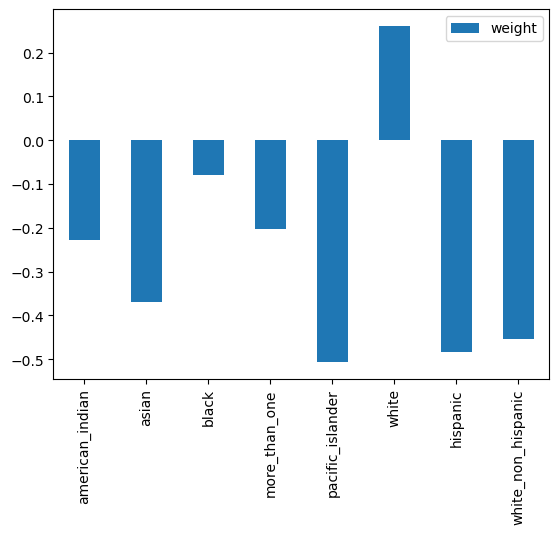

In [11]:
from sklearn.decomposition import PCA
from scipy.special import logit
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./processed_data/2010-2020-race-demographics.csv')\
       .drop(columns = ['year', 'state'])

cols = df.columns
X = logit(df)
pca = PCA(n_components=2).fit(X)
pd.DataFrame(pca.components_[0], index = cols, columns = ['weight']).plot.bar()